## Descriptive Statistics - EDA

Exploratory data analysis (EDA) is amongst the first steps of analyzing data. It is usually done with descriptive statistics, where you'll summarize the statistical aspects of your dataset and start to unravel your insights. Further on, I highly recommend using data visualization in this step.

In [1]:
#!pip install matplotlib
#!pip install seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
pd.set_option('display.max_columns', None) # displays all columns in dfs
#%matplotlib inline
import warnings
warnings.filterwarnings('ignore') # no more warnings 

DOCS for Seaborn = https://seaborn.pydata.org/index.html

In [3]:
data = pd.read_csv('merged_clean_ver2.csv')

In [4]:
# data.dtypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3993 entries, 0 to 3992
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               3993 non-null   int64  
 1   id                       3993 non-null   int64  
 2   state                    3993 non-null   object 
 3   gender                   3993 non-null   object 
 4   median_home_val          3993 non-null   float64
 5   median_household_income  3993 non-null   int64  
 6   ic2                      3993 non-null   float64
 7   ic3                      3993 non-null   int64  
 8   ic4                      3993 non-null   float64
 9   ic5                      3993 non-null   float64
 10  avggift                  3993 non-null   float64
 11  target_d                 3993 non-null   float64
 12  ic2_                     3993 non-null   object 
dtypes: float64(6), int64(4), object(3)
memory usage: 405.7+ KB


In [5]:
summary = data.describe().T

summary['iqr'] = summary['75%']-summary['25%']
summary = summary.apply(round)
summary

,count,mean,std,min,25%,50%,75%,max,iqr
Unnamed: 0,3993.0,1996.0,1153.0,0.0,998.0,1996.0,2994.0,3992.0,1996.0
id,3993.0,98929.0,58180.0,12.0,46153.0,101432.0,151653.0,191779.0,105500.0
median_home_val,3993.0,1158.0,1033.0,0.0,548.0,803.0,1349.0,5982.0,801.0
median_household_income,3993.0,352.0,168.0,0.0,239.0,318.0,425.0,1500.0,186.0
ic2,3993.0,401.0,181.0,0.0,284.0,366.0,478.0,1500.0,194.0
ic3,3993.0,400.0,165.0,0.0,287.0,365.0,480.0,1311.0,193.0
ic4,3993.0,445.0,175.0,0.0,325.0,410.0,528.0,1331.0,203.0
ic5,3993.0,16456.0,9455.0,0.0,11136.0,14356.0,18780.0,174523.0,7644.0
avggift,3993.0,12.0,10.0,2.0,7.0,10.0,14.0,450.0,7.0
target_d,3993.0,16.0,13.0,1.0,10.0,14.0,20.0,200.0,10.0


#### Read a bit about [IQR: inter quartile range](https://medium.com/@vinitasilaparasetty/quartiles-for-beginners-in-data-science-2ca5a640b07b)

![iqr](https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Boxplot_vs_PDF.svg/1200px-Boxplot_vs_PDF.svg.png)

IQR can be a good way to spot outliers (outliers are values too big or too small for your analysis).

#### ------

### Exploratory data analysis using Matplotlib

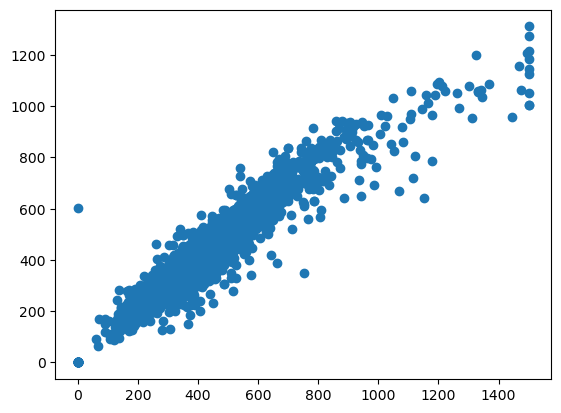

In [6]:
# Plotting 2 variables
plt.scatter(data['ic2'], data['ic3'])
plt.show()

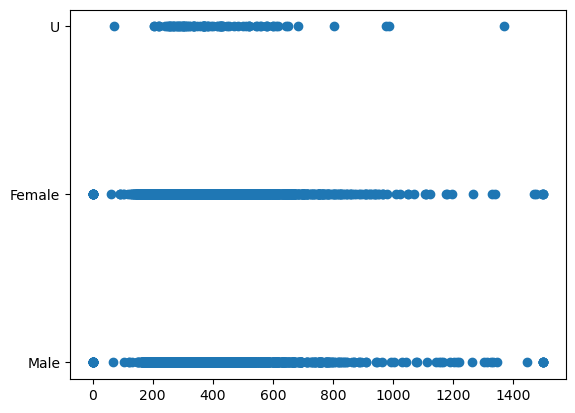

In [7]:
# With categorical values
plt.scatter(x=data['ic2'], y = data['gender'])
plt.show()

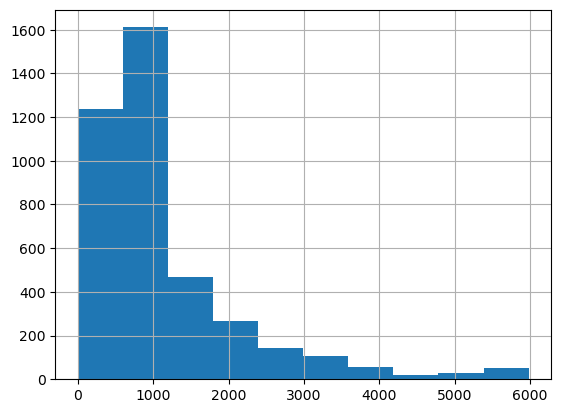

In [8]:
# Acumulative values divided into groups(bins)
data['median_home_val'].hist()
plt.show()

# xsticks()
# ysticks()

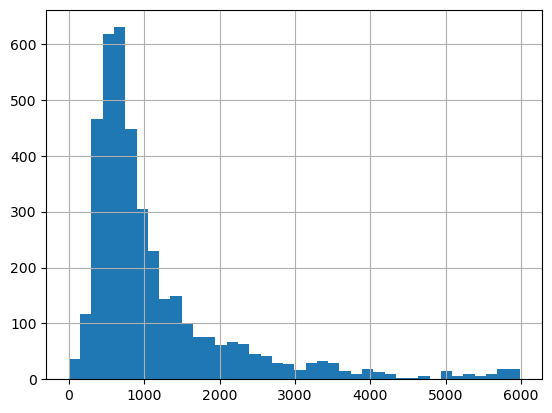

In [9]:
data['median_home_val'].hist(bins=40)
plt.show()

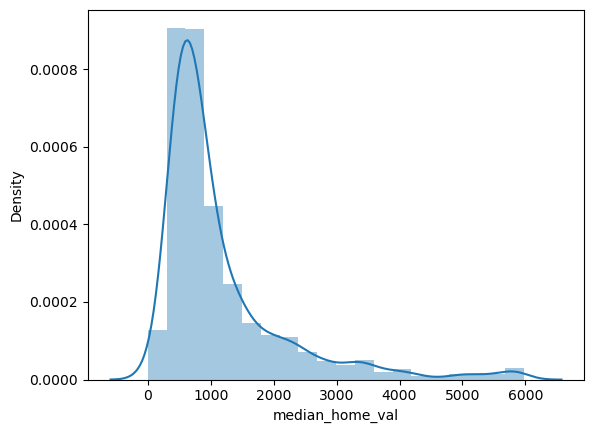

In [10]:
# Same but with the kernel density estimation (KDE). Is a non-parametric way to estimate the probability density function 
sns.distplot(data['median_home_val'], bins=20)
plt.show()

#### Boxplot

** When reviewing a box plot, an outlier is defined as a data point that is located outside the whiskers of the box plot. For example, outside 1.5 times the interquartile range above the upper quartile and below the lower quartile ** 

(Q1 - 1.5 * IQR or Q3 + 1.5 * IQR).

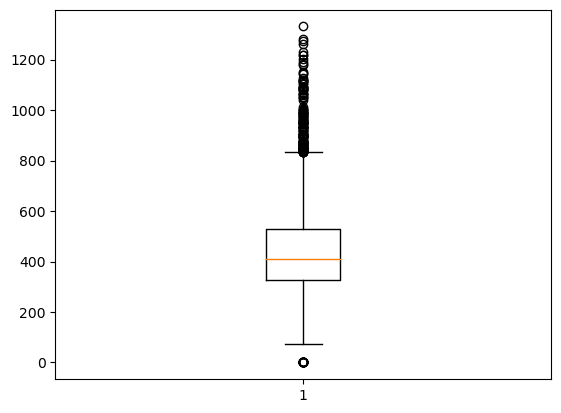

In [11]:
plt.boxplot(data['ic4'])
plt.show()

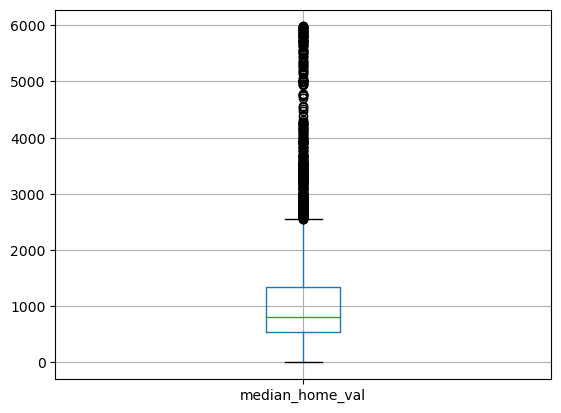

In [12]:
data[['median_home_val']].boxplot()
plt.show()

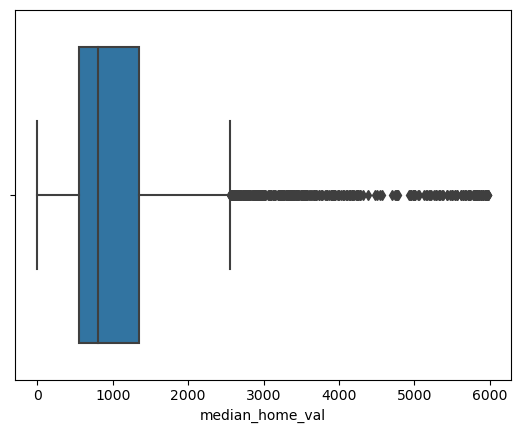

In [13]:
sns.boxplot(x="median_home_val", data=data) # same as sns.boxplot(data["median_home_val"])
plt.show()

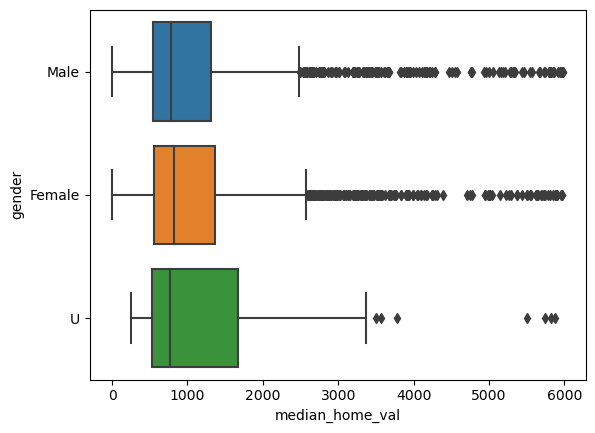

In [14]:
#For categorical variables
sns.boxplot(x='median_home_val', y='gender', data = data)
plt.show()

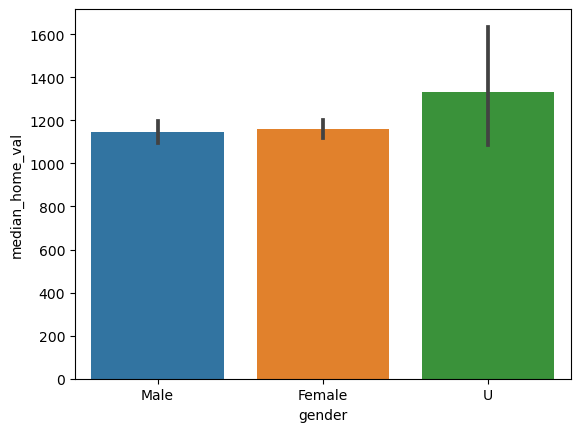

In [15]:
#For categorical variables
sns.barplot(x='gender', y ="median_home_val", data = data)
plt.show()

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3993 entries, 0 to 3992
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               3993 non-null   int64  
 1   id                       3993 non-null   int64  
 2   state                    3993 non-null   object 
 3   gender                   3993 non-null   object 
 4   median_home_val          3993 non-null   float64
 5   median_household_income  3993 non-null   int64  
 6   ic2                      3993 non-null   float64
 7   ic3                      3993 non-null   int64  
 8   ic4                      3993 non-null   float64
 9   ic5                      3993 non-null   float64
 10  avggift                  3993 non-null   float64
 11  target_d                 3993 non-null   float64
 12  ic2_                     3993 non-null   object 
dtypes: float64(6), int64(4), object(3)
memory usage: 405.7+ KB


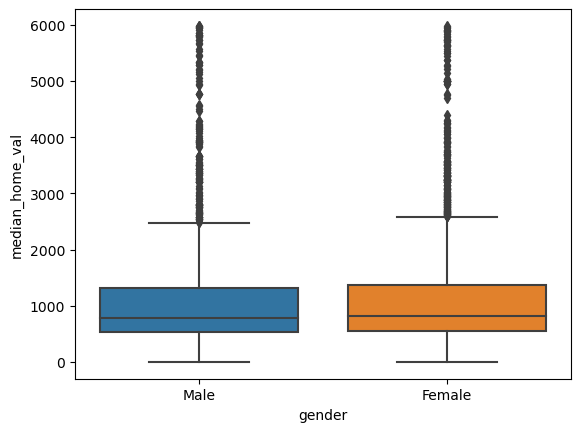

In [17]:
data1 = data[(data['gender']=='Male') | (data['gender'] == 'Female')]
data1
sns.boxplot(x='gender', y='median_home_val', data=data1)
plt.show()

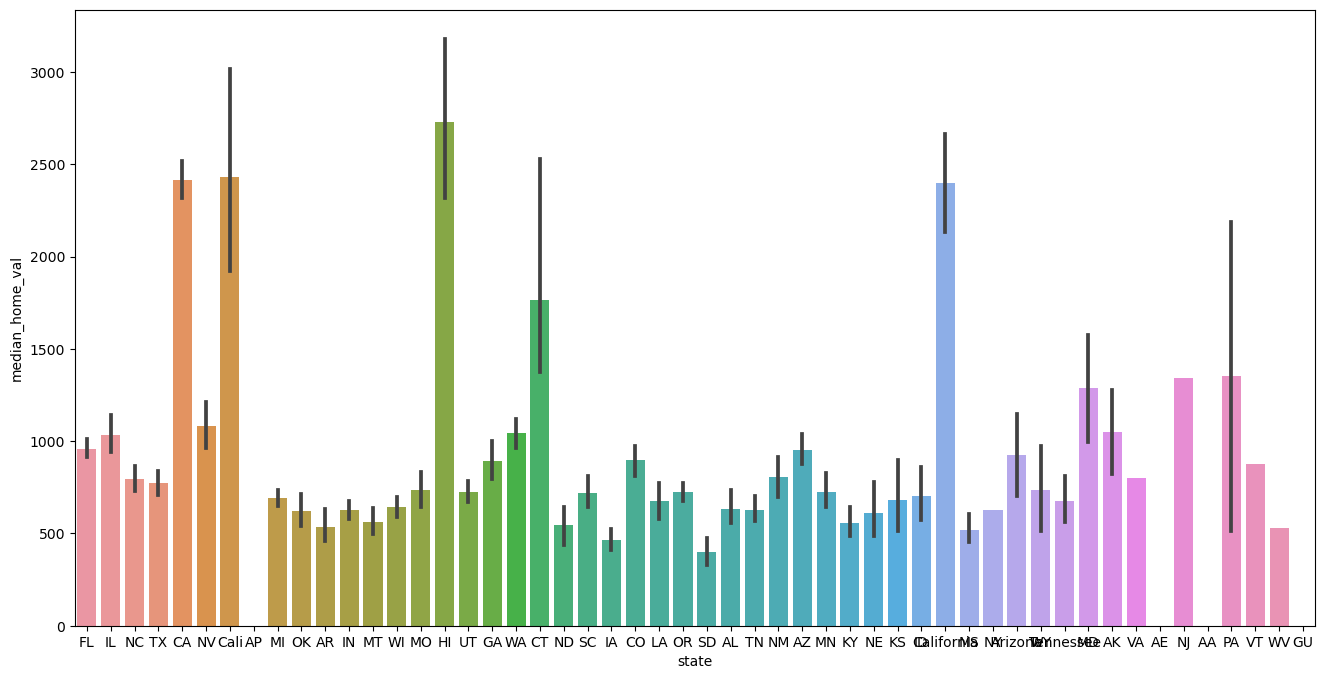

In [18]:
plt.figure(figsize=(16,8))

sns.barplot(x="state", y="median_home_val", data=data1)
plt.show()

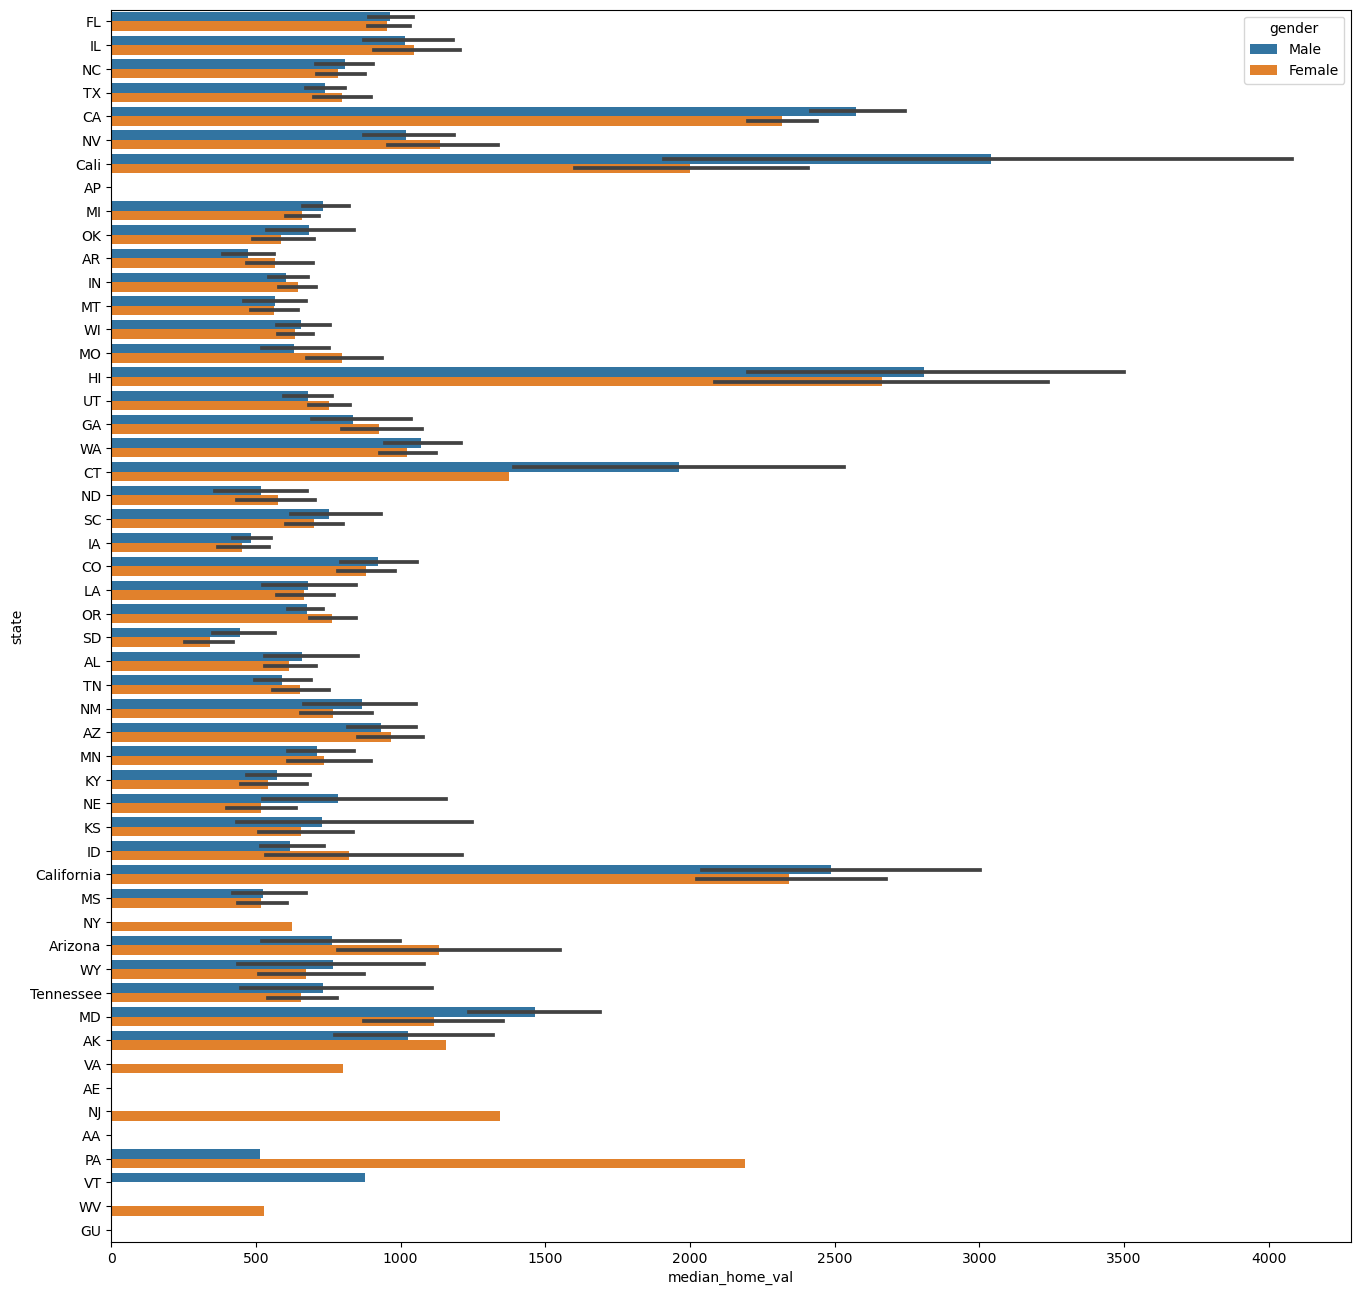

In [19]:
plt.figure(figsize=(16,16))

sns.barplot(y="state", x="median_home_val", hue='gender', data=data1)
plt.show()

<AxesSubplot:xlabel='state', ylabel='count'>

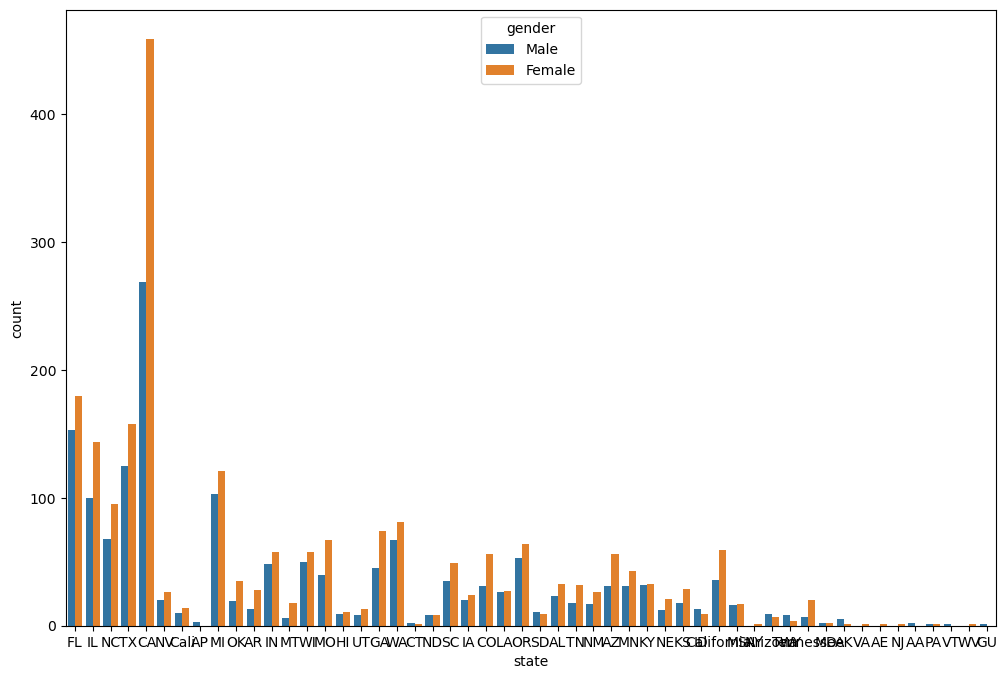

In [20]:
plt.figure(figsize=(12,8))
sns.countplot('state', hue='gender', data=data1)

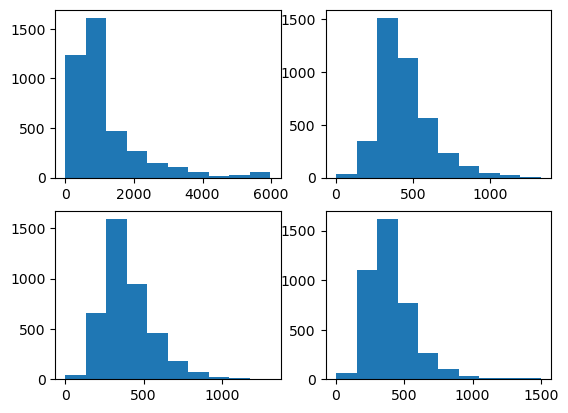

In [21]:
# multiple plots in the same space

fig, axs = plt.subplots(2, 2)

axs[0, 0].hist(data['median_home_val'])
axs[0, 1].hist(data['ic4'])
axs[1, 0].hist(data['ic3'])
axs[1, 1].hist(data['ic2'])

plt.show()

In [22]:
axs[1, 0].hist(data['ic3'])
axs[1, 1].hist(data['ic2'])

plt.show()

<AxesSubplot:ylabel='Percent'>

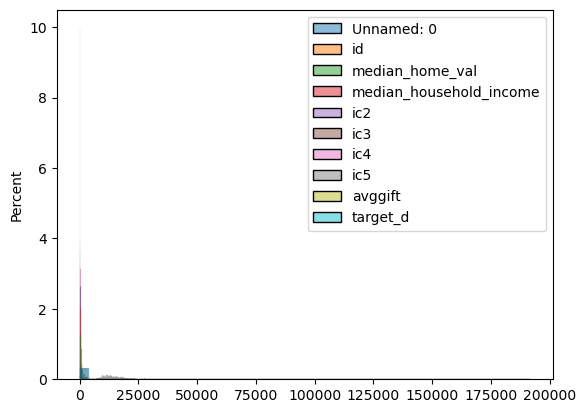

In [27]:
# show histplot with percent: sns.histplot(data=data, x='Sales Channel', hue='Response', stat='percent') 

#### ------

### Intro to Correlation and Covariance
Measures the relationship and the dependency between two variables. “Covariance” indicates the direction of the linear relationship between variables. “Correlation” measures the direction and strength of the linear relationship between two variables. They can be calculated by:
* Pearson: measure the strength of linear correlation; (continuos data)
* Spearman: measure the strength of non-linear correlation also; (continuous and discrete/ordinal data)
* Kendall: similar to Spearman, but values are closer to zero and is less sensitive to outliers.

#### A more dense read [here](https://towardsdatascience.com/under-the-hood-correlation-and-collinearity-b6674b1fb33b)

In [ ]:
x = data['ic2']
y = data['ic3']

plt.scatter(x, y)
plt.show()

In [ ]:
x.corr(y) # standard is 'pearson', you can change it by adding --> method='spearman'

In [ ]:
data.corr(method='spearman')#['target_d']

In [ ]:
# Extra: 
stats.pearsonr(x, y), stats.spearmanr(x, y), stats.kendalltau(x, y)

#### ------

In [ ]:
corr_data = data.select_dtypes([np.number])
correlations_matrix = corr_data.corr()  # method='spearman'
correlations_matrix

In [ ]:
correlations_matrix[(correlations_matrix['target_d'] > .2) | (correlations_matrix['target_d'] < -.2)]['target_d']

In [ ]:
sns_plot = sns.heatmap(correlations_matrix, annot=True)
figure = sns_plot.get_figure()    
figure.savefig('svm_conf.png', dpi=400)
plt.show()
# plt.savefig('name_i_want.png')

In [ ]:
mask = np.zeros_like(correlations_matrix)

mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()